# BioBot_FDS_04_Simple_NN_TF Model
## Deliverable_04: Implementing a simple Neural Network Model with TensorFlow
Author/code developer: Yan Bello. 14/11/2018. As part of the Master in Artificial Intelligence (UNIR). 
This file/code is part of the development and exploration/experimentation on a Fall Detection System (FDS). 

---


In the following sections, we used this dataset: 
SisFall: A Fall and Movement Dataset. 
Created by: A. Sucerquia, J.D. López, J.F. Vargas-Bonilla
SISTEMIC, Faculty of Engineering, Universidad de Antiquia UDEA.
Detailed information about this dataset can be found in this website: http://sistemic.udea.edu.co/en/investigacion/proyectos/english-falls/.
Reference paper: Sucerquia A, López JD, Vargas-Bonilla JF. SisFall: A Fall and Movement Dataset. Sensors (Basel). 2017;17(1):198. Published 2017 Jan 20. doi:10.3390/s17010198

---



In [0]:
# Preliminary step 0. We need to establish/select our working folders. First, ensure  the previous dataset files are available.
# The code below is prepared to work with two options: local drive or mounting a Google Drive for Colab
# Select the appropriate configuration for your environment by commenting/un-commenting the following lines:

# To work with Google Colab and Google Drive: 
from google.colab import drive 
drive.mount('/content/gdrive')
FILE_DIRECTORY =  "gdrive/My Drive/Colab Notebooks/"
SisFall_ALL_DIRECTORY =  FILE_DIRECTORY + "SisFall_dataset_ALL/"

# To work with a local drive, uncomment these line:
# FILE_DIRECTORY =  os.getcwd() + "\\"
# SisFall_ALL_DIRECTORY =  FILE_DIRECTORY + "SisFall_dataset_ALL\\"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 4.1 Load a dataframe with prepared info from ADL/Falls dataset

In [0]:
# We work with the prepared file Unified_ADL_Falls, which is based on the previous dataset
my_data_file_name = FILE_DIRECTORY + "Unified_ADL_Falls.txt"

import pandas as pd

# Creamos un data frame y cargamos los datos del fichero
df_ADL_Falls = pd.DataFrame(pd.read_csv(my_data_file_name, sep = ','))

df_ADL_Falls.drop('0', axis=1, inplace=True)

df_only_ADLs = df_ADL_Falls[df_ADL_Falls.Fall_ADL == "D"]
df_only_Falls = df_ADL_Falls[df_ADL_Falls.Fall_ADL == "F"]

# mostramos el data frame
print(df_only_ADLs.tail())
print(df_only_Falls.tail())

     Act_Type Age_Cat Fall_ADL              File  kurtosis_S1_X  max_S1_X  \
2697      D19      SE        D  D19_SE06_R01.txt       8.727956       190   
2698      D19      SE        D  D19_SE06_R02.txt      10.096698        86   
2699      D19      SE        D  D19_SE06_R03.txt       9.540330       259   
2700      D19      SE        D  D19_SE06_R04.txt      20.191198       393   
2701      D19      SE        D  D19_SE06_R05.txt       9.022231       230   

      mean_S1_X  min_S1_X  range_S1_X  skewness_S1_X    ...     \
2697  20.204659      -195         385      -1.745292    ...      
2698 -33.031614      -324         410      -1.976282    ...      
2699   8.276206      -154         413       0.398760    ...      
2700   9.514143      -255         648       0.993127    ...      
2701   9.554077      -164         394      -0.149056    ...      

      range_S1_N_VER  skewness_S1_N_VER  std_S1_N_VER  var_S1_N_VER   corr_HV  \
2697        1.531165           2.009740      0.189131      

### Shuffle and set up training and test samples for ADL/Falls

In [0]:
import random
import math
from numpy.random import permutation

# Randomly shuffle the index of each set (ADLs and Falls)
# -------------------------------------------------------
# First we prepare the sets of ADLs
random_indices = permutation(df_only_ADLs.index)
# Use a test-split (of 30% of the items)
test_split = math.floor(len(df_only_ADLs)*0.3)
# Test set with 30% of items
df_only_ADLs_test = df_only_ADLs.loc[random_indices[0:test_split]]
# Train set with 70% of the items.
df_only_ADLs_train = df_only_ADLs.loc[random_indices[test_split:]]


# -------------------------------------------------------
# Now we prepare the sets of Falls
random_indices = permutation(df_only_Falls.index)
# Use a test-split (of 30% of the items)
test_split = math.floor(len(df_only_Falls)*0.3)
# Test set with 30% of items
df_only_Falls_test = df_only_Falls.loc[random_indices[0:test_split]]
# Train set with 70% of the items.
df_only_Falls_train = df_only_Falls.loc[random_indices[test_split:]]



print("Total ADL: " + str(len(df_only_ADLs)))
print("Total Falls: " + str(len(df_only_Falls)))
print("GRAND Total: " + str(len(df_only_Falls)+len(df_only_ADLs)))
print("---------------------------------------")
print("Train Falls: "+ str(len(df_only_Falls_train)))
print("Train ADL: "+ str(len(df_only_ADLs_train)))
print("Train TOTAL: "+ str(len(df_only_ADLs_train)+len(df_only_Falls_train)))
print("---------------------------------------")
print("Test Falls: "+ str(len(df_only_Falls_test)))
print("Test ADL: "+ str(len(df_only_ADLs_test)))
print("Test TOTAL: "+ str(len(df_only_ADLs_test)+len(df_only_Falls_test)))

Total ADL: 2702
Total Falls: 1798
GRAND Total: 4500
---------------------------------------
Train Falls: 1259
Train ADL: 1892
Train TOTAL: 3151
---------------------------------------
Test Falls: 539
Test ADL: 810
Test TOTAL: 1349


In [0]:
# Prepare dataset with Test examplars

frames = [df_only_Falls_test, df_only_ADLs_test]
df_ADL_Falls_test = pd.concat(frames)
print("Test ADLs: "+ str(len(df_only_ADLs_test)))
print("Test Falls: "+ str(len(df_only_Falls_test)))
print("Test ALL: "+ str(len(df_ADL_Falls_test)))

print(df_ADL_Falls_test.head())
print(df_ADL_Falls_test.tail())


Test ADLs: 810
Test Falls: 539
Test ALL: 1349
     Act_Type Age_Cat Fall_ADL              File  kurtosis_S1_X  max_S1_X  \
3477      F07      SA        F  F07_SA12_R02.txt      28.158868      1730   
4496      F15      SE        F  F15_SE06_R02.txt      14.164169       128   
3031      F03      SA        F  F03_SA19_R01.txt      88.093106       191   
4384      F15      SA        F  F15_SA01_R05.txt      64.593266      2619   
3719      F09      SA        F  F09_SA12_R04.txt       2.035594        19   

       mean_S1_X  min_S1_X  range_S1_X  skewness_S1_X    ...     \
3477   63.324459      -510        2240       3.887497    ...      
4496 -155.198003      -911        1039      -3.036554    ...      
3031 -146.509151     -4096        4287      -8.141281    ...      
4384 -159.004992     -4053        6672      -5.225071    ...      
3719 -147.504160      -835         854      -1.118020    ...      

      range_S1_N_VER  skewness_S1_N_VER  std_S1_N_VER  var_S1_N_VER   corr_HV  \
3477   

In [0]:
# Prepare dataset with Train examplars

frames = [df_only_Falls_train, df_only_ADLs_train]
df_ADL_Falls_train = pd.concat(frames)
print("train ADLs: "+ str(len(df_only_ADLs_train)))
print("train Falls: "+ str(len(df_only_Falls_train)))
print("train ALL: "+ str(len(df_ADL_Falls_train)))

print(df_ADL_Falls_train.head())
print(df_ADL_Falls_train.tail())


train ADLs: 1892
train Falls: 1259
train ALL: 3151
     Act_Type Age_Cat Fall_ADL              File  kurtosis_S1_X  max_S1_X  \
4149      F13      SA        F  F13_SA02_R05.txt       4.165379        53   
3575      F08      SA        F  F08_SA07_R05.txt       4.422467       205   
4172      F13      SA        F  F13_SA07_R03.txt       2.065487       221   
3303      F06      SA        F  F06_SA01_R03.txt      12.473522       893   
3400      F06      SA        F  F06_SA20_R05.txt      10.054013      1396   

       mean_S1_X  min_S1_X  range_S1_X  skewness_S1_X    ...     \
4149 -147.003328      -918         971      -1.356286    ...      
3575 -143.532446      -989        1194      -1.547840    ...      
4172  -81.241265      -463         684      -0.420039    ...      
3303  129.995008       -88         981       2.952118    ...      
3400  123.337770      -565        1961       2.090652    ...      

      range_S1_N_VER  skewness_S1_N_VER  std_S1_N_VER  var_S1_N_VER   corr_HV  \
41

## 4.2 Utility function to display training/validation performance data
Note: the code in the following cell was adapted/extended by from a code-sample shared in class.

In [0]:
import matplotlib
import matplotlib.pyplot as plt

def plot_acc(history, title="Model Accuracy"):
    """Displays a grapth with the accuracy per epoch, obtained in a training session"""
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
def plot_loss(history, title="Model Loss"):
    """Displays a grapth with the loss per epoch, obtained in a training session"""
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()
    
def plot_compare_losses(history1, history2, name1="Red 1",
                        name2="Red 2", title="Graph title"):
    """Compares losses trainings: name1 y name2"""
    plt.plot(history1.history['loss'], color="green")
    plt.plot(history1.history['val_loss'], 'r--', color="green")
    plt.plot(history2.history['loss'], color="blue")
    plt.plot(history2.history['val_loss'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2],
               loc='upper right')
    plt.show()
    
def plot_compare_accs(history1, history2, name1="Red 1",
                      name2="Red 2", title="Graph title"):
    """Compares accuracies of trainings: nombres name1 y name2"""
    plt.plot(history1.history['acc'], color="green")
    plt.plot(history1.history['val_acc'], 'r--', color="green")
    plt.plot(history2.history['acc'], color="blue")
    plt.plot(history2.history['val_acc'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2], 
               loc='lower right')
    plt.show()
    
    
def plot_compare_losses3(history1, history2, history3, name1="Red 1",
                        name2="Red 2", name3="Red 3", title="Graph title"):
    """Compares losses of: namea, name2 y name3"""
    plt.plot(history1.history['loss'], color="green")
    plt.plot(history1.history['val_loss'], 'r--', color="green")
    plt.plot(history2.history['loss'], color="blue")
    plt.plot(history2.history['val_loss'], 'r--', color="blue")
    plt.plot(history3.history['loss'], color="purple")
    plt.plot(history3.history['val_loss'], 'r--', color="purple")

    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2,
                'Train ' + name3, 'Val ' + name3],               
               loc='upper right')
    plt.show()
    
def plot_compare_accs3(history1, history2, history3, name1="Red 1",
                        name2="Red 2", name3="Red 3", title="Graph title"):
    """Compares accuracies of: namea, name2 y name3"""
    plt.plot(history1.history['acc'], color="green")
    plt.plot(history1.history['val_acc'], 'r--', color="green")
    plt.plot(history2.history['acc'], color="blue")
    plt.plot(history2.history['val_acc'], 'r--', color="blue")
    plt.plot(history3.history['acc'], color="purple")
    plt.plot(history3.history['val_acc'], 'r--', color="purple")
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2, 
               'Train ' + name3, 'Val ' + name3], 
               loc='lower right')
    plt.show()

## 4.3 Define and train a Neural Network - based classifier using TensorFlow
Below we use TensorFlow Sequential for experimenting with various parameter settings. For clarity and simplicity here only one model configuration is included.

### Define, compile and train the Neural Network model

In [0]:
# Import TensorFlow & tf.keras
import tensorflow as tf
from tensorflow import keras

# The columns that we will be making predictions with...
x_columns = ['kurtosis_S1_X','max_S1_X','mean_S1_X','min_S1_X','range_S1_X','skewness_S1_X','std_S1_X','var_S1_X',
             'kurtosis_S1_Y','max_S1_Y','mean_S1_Y','min_S1_Y','range_S1_Y','skewness_S1_Y','std_S1_Y','var_S1_Y',
             'kurtosis_S1_Z','max_S1_Z','mean_S1_Z','min_S1_Z','range_S1_Z','skewness_S1_Z','std_S1_Z','var_S1_Z',
             'kurtosis_S1_N_XYZ','max_S1_N_XYZ','mean_S1_N_XYZ','min_S1_N_XYZ','range_S1_N_XYZ','skewness_S1_N_XYZ','std_S1_N_XYZ','var_S1_N_XYZ',
             'kurtosis_S1_N_HOR','max_S1_N_HOR','mean_S1_N_HOR','min_S1_N_HOR','range_S1_N_HOR','skewness_S1_N_HOR','std_S1_N_HOR','var_S1_N_HOR',
             'kurtosis_S1_N_VER','max_S1_N_VER','mean_S1_N_VER','min_S1_N_VER','range_S1_N_VER','skewness_S1_N_VER','std_S1_N_VER','var_S1_N_VER',
             'corr_HV','corr_NH','corr_NV','corr_XY','corr_XZ','corr_YZ']

# The column that we want to predict.
y_column = ["Fall_ADL_BIN"]

fn_Fall_ADL_BIN = lambda row: (1) if row.Fall_ADL == "F" else (0)
col = df_ADL_Falls_train.apply(fn_Fall_ADL_BIN, axis=1) # get column data with an index
df_ADL_Falls_train = df_ADL_Falls_train.assign(Fall_ADL_BIN=col.values) # assign values to column 'c'

col = df_ADL_Falls_test.apply(fn_Fall_ADL_BIN, axis=1) # get column data with an index
df_ADL_Falls_test = df_ADL_Falls_test.assign(Fall_ADL_BIN=col.values) # assign values to column 'c'

# Define the neural network
my_model_NN = keras.Sequential([
    # Define the layers
    keras.layers.Dense(32, input_shape=(len(x_columns),)),
    keras.layers.Dense(64, activation=tf.nn.sigmoid),
    keras.layers.Dense(32, activation=tf.nn.sigmoid),
    # output layer has 2 units (neurons) considering two categories: FALL/ADL
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [0]:
# compile the model
my_model_NN.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
import numpy as np

x_train = df_ADL_Falls_train[x_columns]
y = df_ADL_Falls_train.loc[:,['Fall_ADL_BIN']]
y_train = np.array(y)

x_val = df_ADL_Falls_test[x_columns]
y = df_ADL_Falls_test.loc[:,['Fall_ADL_BIN']]
y_val = np.array(y)

# train the model 250 epochs
history = my_model_NN.fit(x_train, y_train, epochs=250, batch_size=250, 
                          validation_data=(x_val, y_val),) # using X_val/y_val for validation

Train on 3151 samples, validate on 1349 samples
Epoch 1/250
3151/3151 [==============================] - 0s 92us/step - loss: 0.7075 - acc: 0.6004 - val_loss: 0.6779 - val_acc: 0.6004
Epoch 2/250
3151/3151 [==============================] - 0s 11us/step - loss: 0.6586 - acc: 0.6004 - val_loss: 0.6427 - val_acc: 0.6004
Epoch 3/250
3151/3151 [==============================] - 0s 31us/step - loss: 0.6421 - acc: 0.6004 - val_loss: 0.6275 - val_acc: 0.6004
Epoch 4/250
3151/3151 [==============================] - 0s 31us/step - loss: 0.6227 - acc: 0.6023 - val_loss: 0.6142 - val_acc: 0.6086
Epoch 5/250
3151/3151 [==============================] - 0s 13us/step - loss: 0.6127 - acc: 0.6223 - val_loss: 0.6121 - val_acc: 0.6227
Epoch 6/250
3151/3151 [==============================] - 0s 27us/step - loss: 0.6061 - acc: 0.6442 - val_loss: 0.6117 - val_acc: 0.6219
Epoch 7/250
3151/3151 [==============================] - 0s 22us/step - loss: 0.6067 - acc: 0.6420 - val_loss: 0.5999 - val_acc: 0.6264


3151/3151 [==============================] - 0s 11us/step - loss: 0.4985 - acc: 0.7560 - val_loss: 0.5117 - val_acc: 0.7302
Epoch 61/250
3151/3151 [==============================] - 0s 10us/step - loss: 0.5011 - acc: 0.7560 - val_loss: 0.4955 - val_acc: 0.7472
Epoch 62/250
3151/3151 [==============================] - 0s 10us/step - loss: 0.4964 - acc: 0.7629 - val_loss: 0.4894 - val_acc: 0.7598
Epoch 63/250
3151/3151 [==============================] - 0s 11us/step - loss: 0.5000 - acc: 0.7671 - val_loss: 0.5245 - val_acc: 0.7769
Epoch 64/250
3151/3151 [==============================] - 0s 11us/step - loss: 0.5190 - acc: 0.7715 - val_loss: 0.4992 - val_acc: 0.7761
Epoch 65/250
3151/3151 [==============================] - 0s 15us/step - loss: 0.5000 - acc: 0.7671 - val_loss: 0.4980 - val_acc: 0.7732
Epoch 66/250
3151/3151 [==============================] - 0s 18us/step - loss: 0.4913 - acc: 0.7725 - val_loss: 0.4801 - val_acc: 0.7798
Epoch 67/250
3151/3151 [==============================

Epoch 120/250
3151/3151 [==============================] - 0s 11us/step - loss: 0.4296 - acc: 0.8004 - val_loss: 0.4210 - val_acc: 0.8147
Epoch 121/250
3151/3151 [==============================] - ETA: 0s - loss: 0.4644 - acc: 0.788 - 0s 10us/step - loss: 0.4267 - acc: 0.8013 - val_loss: 0.4183 - val_acc: 0.8095
Epoch 122/250
3151/3151 [==============================] - 0s 10us/step - loss: 0.4251 - acc: 0.8150 - val_loss: 0.4145 - val_acc: 0.8073
Epoch 123/250
3151/3151 [==============================] - 0s 13us/step - loss: 0.4188 - acc: 0.8105 - val_loss: 0.4171 - val_acc: 0.8036
Epoch 124/250
3151/3151 [==============================] - 0s 9us/step - loss: 0.4230 - acc: 0.8051 - val_loss: 0.4042 - val_acc: 0.8221
Epoch 125/250
3151/3151 [==============================] - 0s 16us/step - loss: 0.4359 - acc: 0.7832 - val_loss: 0.4341 - val_acc: 0.7932
Epoch 126/250
3151/3151 [==============================] - 0s 14us/step - loss: 0.4426 - acc: 0.7858 - val_loss: 0.4333 - val_acc: 0.78

3151/3151 [==============================] - 0s 21us/step - loss: 0.4397 - acc: 0.7858 - val_loss: 0.4437 - val_acc: 0.7635
Epoch 180/250
3151/3151 [==============================] - 0s 19us/step - loss: 0.4618 - acc: 0.7610 - val_loss: 0.4541 - val_acc: 0.8028
Epoch 181/250
3151/3151 [==============================] - 0s 25us/step - loss: 0.4419 - acc: 0.8013 - val_loss: 0.4162 - val_acc: 0.8147
Epoch 182/250
3151/3151 [==============================] - 0s 71us/step - loss: 0.4174 - acc: 0.7902 - val_loss: 0.4068 - val_acc: 0.7939
Epoch 183/250
3151/3151 [==============================] - 0s 45us/step - loss: 0.3966 - acc: 0.8067 - val_loss: 0.3955 - val_acc: 0.8036
Epoch 184/250
3151/3151 [==============================] - 0s 29us/step - loss: 0.3998 - acc: 0.8023 - val_loss: 0.3959 - val_acc: 0.8399
Epoch 185/250
3151/3151 [==============================] - 0s 34us/step - loss: 0.4076 - acc: 0.8204 - val_loss: 0.4050 - val_acc: 0.8154
Epoch 186/250
3151/3151 [=======================

3151/3151 [==============================] - 0s 23us/step - loss: 0.3921 - acc: 0.8331 - val_loss: 0.3789 - val_acc: 0.8391
Epoch 239/250
3151/3151 [==============================] - 0s 15us/step - loss: 0.3906 - acc: 0.8308 - val_loss: 0.3724 - val_acc: 0.8510
Epoch 240/250
3151/3151 [==============================] - 0s 16us/step - loss: 0.3921 - acc: 0.8356 - val_loss: 0.3880 - val_acc: 0.8436
Epoch 241/250
3151/3151 [==============================] - 0s 14us/step - loss: 0.4055 - acc: 0.8182 - val_loss: 0.3802 - val_acc: 0.8414
Epoch 242/250
3151/3151 [==============================] - 0s 16us/step - loss: 0.3899 - acc: 0.8331 - val_loss: 0.3710 - val_acc: 0.8547
Epoch 243/250
3151/3151 [==============================] - 0s 15us/step - loss: 0.3920 - acc: 0.8366 - val_loss: 0.3753 - val_acc: 0.8443
Epoch 244/250
3151/3151 [==============================] - 0s 13us/step - loss: 0.3921 - acc: 0.8334 - val_loss: 0.3772 - val_acc: 0.8340
Epoch 245/250
3151/3151 [=======================

#### Accuracy and Loss Performance of the Neural Network Training

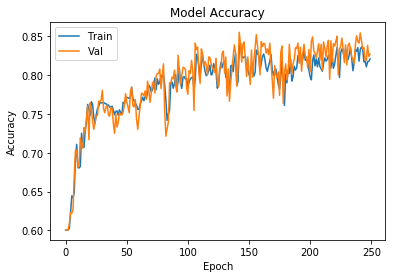

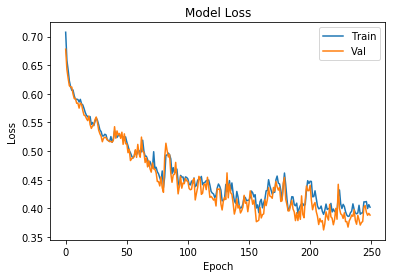

In [0]:
# Visualize results (using history for accuracy and loss)

plot_acc(history, "Model Accuracy")
plot_loss(history, "Model Loss")

#### Confusion matrix for Neural Network Classifier

In [0]:
# Evaluate the mode in test set

x_test = df_ADL_Falls_test[x_columns]
y = df_ADL_Falls_test.loc[:,['Fall_ADL_BIN']]
y_test = np.array(y)

# Print the "accuracy/loss" of the model
test_loss, test_acc = my_model_NN.evaluate(x_test, y_test)
print('The "accuracy" of the model (in the Test set) is:', test_acc)
print('The "loss" of the model (in the Test set) is:', test_loss)

1349/1349 [==============================] - 0s 24us/step
El "accuracy" del modelo (en el conjunto de Test) es: 0.8272794662713121
El "loss" del modelo (en el conjunto de Test) es: 0.38835879150720065


In [0]:
# In this cells, we make the predictions and check the accuracy:

y_pred = my_model_NN.predict(x_test)
Y_pred = np.argmax(y_pred, axis=1)

cm = tf.confusion_matrix(y_test, Y_pred,2)

import tensorflow as tf

# initialize the variable
init_op = tf.initialize_all_variables()

print("Confusion matrix:")
#run the graph
with tf.Session() as sess:
    sess.run(init_op) #execute init_op
    #print the confussion matrix
    array = cm.eval(session=sess)
    print(array)

Confusion matrix:
[[696 114]
 [119 420]]


#### Sensitivity, Specificity, Precision and Accuracy

In [0]:
# calculations of measurements of performance

n_TP = array[0,0]  
n_FP = array[1,0] 
n_TN = array[1,1]
n_FN = array[0,1]

print("-----------------------------")
print("-----------------------------")

# SENSITIVITY = TP / (TP + FN)
NN_Sensitivity = n_TP / (n_TP + n_FN)
print("NN_Sensitivity = "+ str(NN_Sensitivity))

# SPECIFICITY = TN / (FP + TN)
NN_Specificity = n_TN / (n_FP + n_TN)
print("NN_Specificity = "+ str(NN_Specificity))

# Precision = TP / (TP + FP)
NN_Precision = n_TP / (n_TP + n_FP)
print("NN_Precision = "+ str(NN_Precision))

# Accuracy = (TP + TN) / (TP + FP + TN + FN)
NN_Accuracy = (n_TP + n_TN) / (n_TP + n_FP + n_TN + n_FN)
print("NN_Accuracy = "+ str(NN_Accuracy))

-----------------------------
-----------------------------
NN_Sensitivity = 0.8299383543285982
NN_Specificity = 0.8748147149979787
NN_Precision = 0.8695591126088178
NN_Accuracy = 0.8523147214943224
